In [171]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [172]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

In [173]:
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

In [174]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [175]:
wines = pd.concat([white_wine,red_wine])

In [176]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [177]:
wines.shape

(6497, 14)

In [178]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red,medium
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red,medium
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red,medium


In [179]:
# split up our dataset into inputs (X) and our target (y)
X = wines.drop(columns=["quality_label", "wine_type"])
y = wines["quality_label"]
y

0       medium
1       medium
2       medium
3       medium
4          low
         ...  
6492    medium
6493    medium
6494    medium
6495    medium
6496      high
Name: quality_label, Length: 6497, dtype: object

In [180]:
# Split the dataset into train and test data
# The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.
# The first two parameters are the input and target data we split up earlier
# This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from
# ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results
# Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,random_state=1,stratify=y)

In [181]:
X_train.shape

(5847, 12)

In [182]:
y_test.shape

(650,)

In [183]:
# Next, we have to build the model
# from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
# n_neighbors = 3 -> this means that if at least 2 out of the 3 nearest points to an new data point are of "low quality" then the new data point will be labeled as "low quality"
# Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [184]:
# Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.
# To save space, we will only show print the first 20 predictions of our test set.
knn.predict(X_test)[0:20]

array(['medium', 'medium', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'low', 'medium', 'high',
       'medium', 'medium', 'medium', 'medium', 'medium'], dtype=object)

In [185]:
# Now let’s see how our accurate our model is on the full test set. 
# To do this, we will use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.
knn.score(X_test, y_test)

0.7138461538461538

In [186]:
# Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set
# The train-test-split method we used in earlier is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [187]:
# train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
cv_scores
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7280275951915675


In [188]:
# Hypertuning model parameters using GridSearchCV: Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy.
# GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
# For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.
# Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [189]:
from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()

In [190]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}

In [191]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [192]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [193]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [194]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7747558363127226

In [195]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'quality_label'],
      dtype='object')

In [196]:
# converting the response variables(3-7) as binary response variables that is either good or bad
#names = ['bad', 'good']
#bins = (2, 6.5, 8)
#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)
wines['quality'] = wines['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [197]:
# analyzing the different values present in the dependent variable(quality column)
wines['quality'].value_counts()

good    4108
bad     2384
Name: quality, dtype: int64

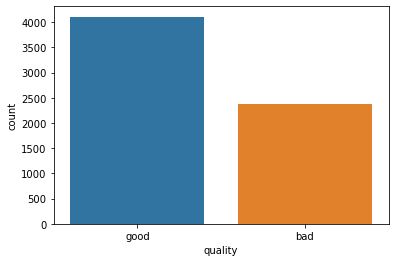

In [198]:
sns.countplot(wines['quality']);

In [199]:
wines.fillna(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,good,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,good,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,good,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,good,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,bad,white,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,good,white,medium
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,good,red,medium
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,good,red,medium
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,good,red,medium


In [200]:
# dividing the dataset into dependent and independent variables
x = wines.iloc[:,:11]
y = wines.iloc[:,11]
# determining the shape of x and y.
print(x.shape)
print(y.shape)

(6497, 11)
(6497,)


In [201]:
# dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 11)
(4872,)
(1625, 11)
(1625,)


In [202]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [211]:
wines.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6492
wine_type               6497
quality_label           6497
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [1]:
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Let's try to do some evaluation for decision tree model using cross validation.
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()